    Classification using CNN 

- Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

- image to array conversion:

In [2]:
# Function to convert image to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

In [ ]:
# Directory containing different types of images
base_dir = "Intel Image Dataset"
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

- categorization of target variable:

In [4]:
image_list, label_list = [], []

# Reading and converting images to numpy arrays
for category in categories:
    path = os.path.join(base_dir, category)
    label = categories.index(category)
    for file in os.listdir(path):
        image_path = os.path.join(path, file)
        image_list.append(convert_image_to_array(image_path))
        label_list.append(label)

- normalization

In [5]:
# Converting lists to numpy arrays
image_list = np.array(image_list, dtype=np.float16) / 255.0
label_list = np.array(label_list)

- train-test split

In [6]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Converting labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


- Defining architectue of CNN
1) First initialize a sequential model, which is a linear stack of layers.
2) Add a convolutional layer to the model with 32 filters, each of size (3, 3), using the ReLU activation function. 
3) Then add a max pooling layer with a pool size of (3, 3), which reduces the spatial dimensions of the input.
4) Add another convolutional layer with 16 filters, each of size (3, 3), using the ReLU activation function.
5) Add another max pooling layer with a pool size of (2, 2).
6) Flatten the 2D output to a 1D vector, preparing it for the fully connected layers.
7) Add a fully connected layer with 8 neurons and uses the ReLU activation function.
8) Add a final dense layer using softmax activation function.

In [7]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(len(categories), activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

- Compile model with Adam optimizer using learning rate of 0.0001, followed by splitting the training dataset into training and validation sets.

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

- Train the model for 50 epochs using a batch size of 128:

In [9]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))

# Saving the weights of the model
model.save_weights('intel_model_weights.h5')

Epoch 1/50
15/15 [==============================] - 55s 3s/step - loss: 1.7579 - accuracy: 0.2110 - val_loss: 1.6960 - val_accuracy: 0.2937
Epoch 2/50
15/15 [==============================] - 39s 3s/step - loss: 1.6326 - accuracy: 0.3715 - val_loss: 1.5893 - val_accuracy: 0.3604
Epoch 3/50
15/15 [==============================] - 37s 2s/step - loss: 1.5299 - accuracy: 0.4127 - val_loss: 1.5226 - val_accuracy: 0.4167
Epoch 4/50
15/15 [==============================] - 37s 2s/step - loss: 1.4624 - accuracy: 0.4690 - val_loss: 1.4716 - val_accuracy: 0.4125
Epoch 5/50
15/15 [==============================] - 36s 2s/step - loss: 1.4053 - accuracy: 0.4747 - val_loss: 1.4346 - val_accuracy: 0.4229
Epoch 6/50
15/15 [==============================] - 39s 3s/step - loss: 1.3631 - accuracy: 0.4919 - val_loss: 1.4170 - val_accuracy: 0.4583
Epoch 7/50
15/15 [==============================] - 41s 3s/step - loss: 1.3303 - accuracy: 0.5122 - val_loss: 1.4015 - val_accuracy: 0.4271
Epoch 8/50
15/15 [==

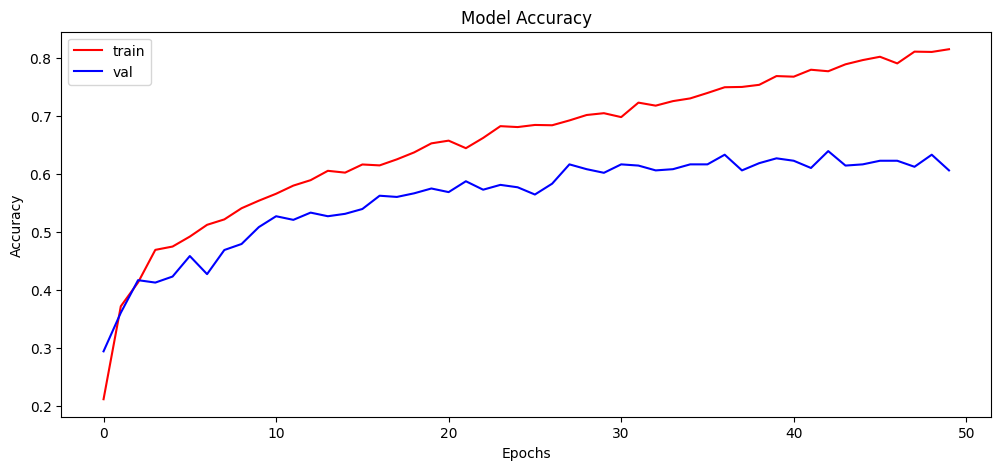

In [10]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

- Saving model

In [ ]:
# Save the trained model to the specified directory
model_save_path = 'intel_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

In [12]:
# Make predictions on the test set
y_pred = model.predict(x_test)

19/19 [==============================] - 4s 185ms/step


    SVM

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from skimage import color, exposure, transform
from skimage.io import imread
import matplotlib.pyplot as plt

# Directory containing different types of images
base_dir = "Intel Image Dataset"
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

image_list, label_list = [], []


# Reading and converting images to numpy arrays
for category in categories:
    path = os.path.join(base_dir, category)
    label = categories.index(category)
    for file in os.listdir(path):
        image_path = os.path.join(path, file)
        img = imread(image_path, as_gray=True)
        img = transform.resize(img, (256, 256), mode='reflect')
        feature_vector = extract_feature_vector(img)  # You need to define extract_feature_vector function
        image_list.append(feature_vector)
        label_list.append(label)

# Converting lists to numpy arrays
X = np.array(image_list)
y = np.array(label_list)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# SVM model with PCA for dimensionality reduction
svm_model = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='linear', C=1))

# Training the SVM model
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")

     Comparison of performances

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate CNN model
cnn_predictions = np.argmax(model.predict(X_test), axis=1)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
print(f"CNN Test Accuracy: {cnn_accuracy*100:.2f}%")

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Test Accuracy: {svm_accuracy*100:.2f}%")

# Print classification reports
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_predictions, target_names=categories))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=categories))

# Plot confusion matrix for CNN
plt.figure(figsize=(10, 8))
cnn_cm = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 8))
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()